In [1]:
# import new data after cleaning
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

kickstarter201801_clean_url='https://gitlab.com/group25/data-analysis-for-kickstarter-projects/raw/master/dataset/ks-projects-201801-Cleaning.csv'
ks_18=pd.read_csv(kickstarter201801_clean_url)
ks_18 = ks_18.loc[ks_18.loc[:,"launched year"]!=2018,:]

In [2]:
ks_18.set_index('ID', inplace = True)
ks_18.head()

category main_category country    launched    deadline  \
ID                                                                         
1000002330          Poetry    Publishing      GB  2015-08-11  2015-10-09   
1000003930  Narrative Film  Film & Video      US  2017-09-02  2017-11-01   
1000004038  Narrative Film  Film & Video      US  2013-01-12  2013-02-26   
1000007540           Music         Music      US  2012-03-17  2012-04-16   
1000011046    Film & Video  Film & Video      US  2015-07-04  2015-08-29   

                              duration  usd_pledged_real  usd_goal_real  \
ID                                                                        
1000002330  59 days 00:00:00.000000000               0.0        1533.95   
1000003930  60 days 00:00:00.000000000            2421.0       30000.00   
1000004038  45 days 00:00:00.000000000             220.0       45000.00   
1000007540  30 days 00:00:00.000000000               1.0        5000.00   
1000011046  56 days 00:00:00.000000000            1283.0       19500.00   

            backers     state  launched year  
ID                                            
1000002330        0    failed           2015  
1000003930       15    failed           2017  
1000004038        3    failed           2013  
1000007540        1    failed           2012  
1000011046       14  canceled           2015

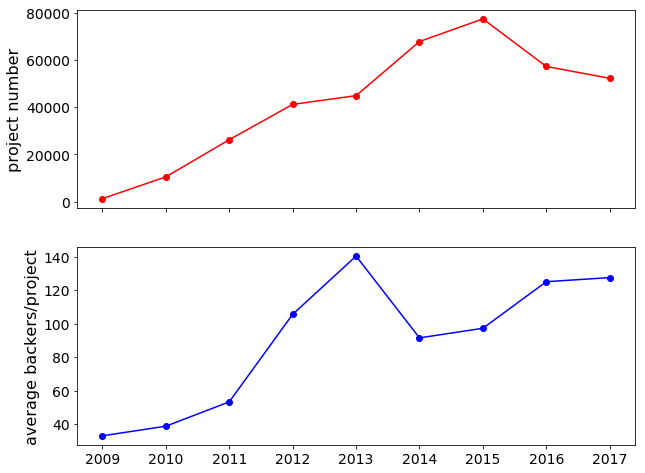

In [3]:
grp_year = ks_18.groupby('launched year')
grp_year_count = grp_year.count()

from matplotlib.pylab import subplots
fig,axs = subplots(2,1,sharex=True, figsize = (10, 8))
font = {'weight': 'normal', 'size': 16}
# number of projects changing with year from 2009-2017
ax = axs[0]
project_count = grp_year_count.category
ax.plot(project_count, 'or-')
ax.set_ylabel('project number',font)
ax.tick_params(labelsize = 14)

ax = axs[1]
year_backers = ks_18.loc[:,('launched year','backers')]
grpyb = year_backers.groupby('launched year')
grp_backers = grpyb.sum()
project_count = grpyb.count()
ave_backers = grp_backers/project_count
ax.plot(ave_backers,'ob-')
ax.set_ylabel('average backers/project',font,)
ax.tick_params(labelsize = 14)
plt.savefig('year_backers.png')
# import matplotlib.ticker as ticker
# plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.1f'))

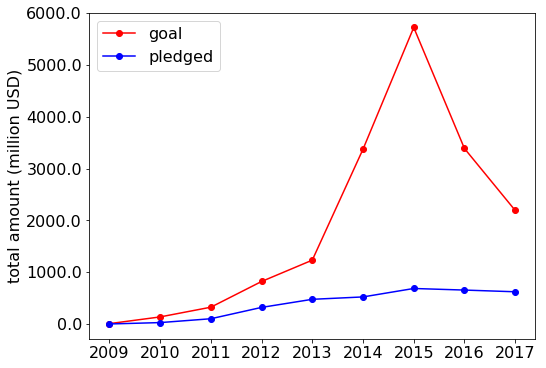

In [4]:
from matplotlib.pylab import subplots
fig,ax = subplots(figsize = (8, 6))
font = {'weight': 'normal', 'size': 16}

year_goal = ks_18.loc[:,('launched year','usd_goal_real')]
grp_goal = year_goal.groupby('launched year').sum()/1000000
ax.plot(grp_goal,'or-')
year_pledged = ks_18.loc[:,('launched year','usd_pledged_real')]
grp_goal = year_pledged.groupby('launched year').sum()/1000000
ax.plot(grp_goal,'ob-')

ax.set_ylabel('total amount (million USD)',font)
plt.tick_params(labelsize = 16)
ax.legend(('goal','pledged'),loc='best',prop = font)
plt.savefig('goal_pledged.png')
import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.1f'))

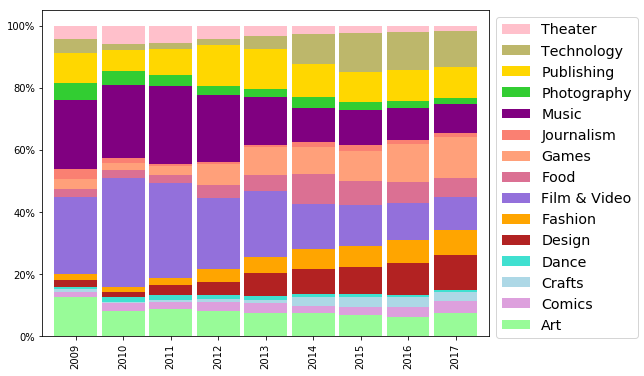

In [5]:
# category project
font = {'weight': 'normal', 'size': 14.2}
year_state = ks_18.loc[:,('launched year','main_category')]
category = np.array(year_state.groupby('main_category').count().index)
year = np.arange(2009,2018);
year_total = np.array(year_state.groupby('launched year').count())
category_year = year_state.groupby(['launched year','main_category'])
data_category = np.zeros([len(year_total),len(category)])
for i in range(len(year)):
    for j in range(len(category)):
        data_category[i,j] = len(category_year.get_group((year[i],category[j])))/year_total[i]*100
df_category = pd.DataFrame(data_category, index = year, columns=category)
from matplotlib.pylab import subplots
color_set = ['salmon','orange','gold','palegreen','turquoise',
             'palevioletred','plum','pink','darkkhaki','lightsalmon','lightblue',
             'mediumpurple','purple','deepskyblue','limegreen','firebrick']
# 'rosybrown','salmon','peachpuff','coral',lightblue

import random
random.shuffle(color_set)
ax = df_category.plot.bar(stacked=True,figsize = (8,6),color = color_set, width = 0.9);

import matplotlib.ticker as mtick

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],bbox_to_anchor=(1,1), loc='best',prop = font)
fmt = '%1.0f%%' # Format you want the ticks, e.g. '40%' 
xticks = mtick.FormatStrFormatter(fmt) 
ax.yaxis.set_major_formatter(xticks) 
plt.savefig('category_year.png')